## Importazione e pulizia dati

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = r'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master'+\
           r'/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
import urllib  # the lib that handles the url stuff

data = urllib.request.urlopen(filename)
lines=[]
for line in data:
    decoded_line = line.decode("utf-8")
    lines.append(decoded_line.split(','))
df = pd.DataFrame(lines[1:], columns=lines[0])

In [3]:
df['data'] = pd.to_datetime(df['data'])

In [4]:
df.replace('', np.nan, inplace=True)
for col in df.columns:
    try:
        df[col] = df[col].apply(float)
    except:
        pass

## Andamento contagi e decessi

In [5]:
z = df['deceduti']

In [6]:
df['diff_deceduti'] = np.r_[z[0], np.diff(z)]

<AxesSubplot:xlabel='data'>

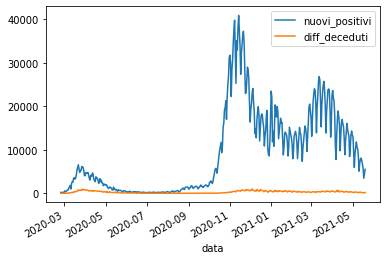

In [7]:
ax = df.plot('data', 'nuovi_positivi')
df.plot('data', 'diff_deceduti',ax =ax)

In [8]:
df['Perc_dec'] = df['diff_deceduti']/df['nuovi_positivi']

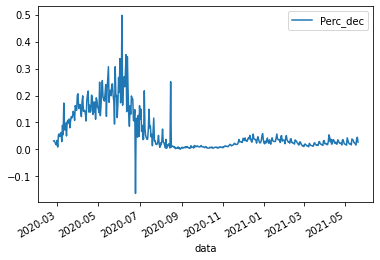

In [9]:
ax = df.plot('data', 'Perc_dec')

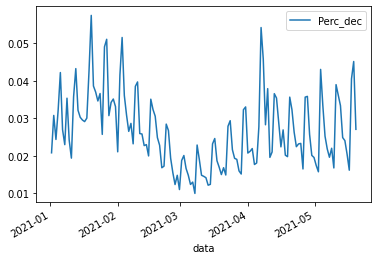

In [10]:
ax = df[df.data>'01.01.2021'].plot('data', 'Perc_dec')

## Andamento contagi e decessi su base settimanale

In [11]:
df_week = df.set_index('data').resample('W').mean()

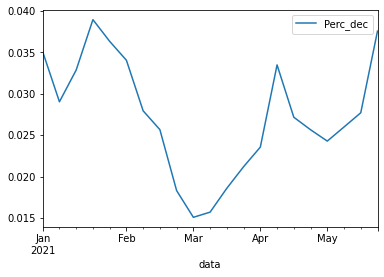

In [12]:
ax = df_week.loc['01.01.2021':].reset_index().plot('data','Perc_dec')

<AxesSubplot:xlabel='data'>

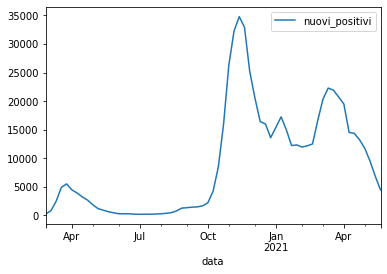

In [13]:
df_week.reset_index().plot('data','nuovi_positivi')

## Andamento dei tamponi molecolari

In [14]:
df['nuovi_tamp_mol'] = np.r_[df['tamponi_test_molecolare'][0], np.diff(df['tamponi_test_molecolare'])]
df['pos_tamp_mol'] = np.r_[df['totale_positivi_test_molecolare'][0], np.diff(df['totale_positivi_test_molecolare'])]

<AxesSubplot:xlabel='data'>

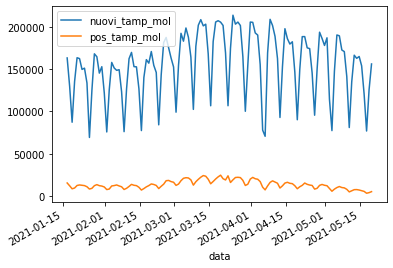

In [15]:
ax = df.plot('data','nuovi_tamp_mol')
df.plot('data','pos_tamp_mol', ax=ax)

### Interessante andamento dei tamponi molecolari con il giorno della settimana

In [16]:
df['day'] = df.data.dt.dayofweek #day_name()
df['%tamp_pos'] = df['pos_tamp_mol']/df['nuovi_tamp_mol']*100

<AxesSubplot:xlabel='day'>

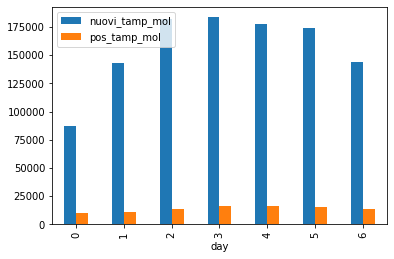

In [17]:
df.groupby('day')[['nuovi_tamp_mol','pos_tamp_mol']].mean().plot.bar() #0 = Monday

<AxesSubplot:xlabel='day'>

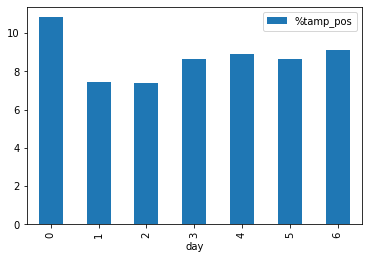

In [18]:
df.groupby('day')[['%tamp_pos']].mean().plot.bar()